In [1]:
!pip install duckdb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install jupyter-duckdb

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import duckdb

In [5]:
train_path = '/scratch/namana.s/train.parquet'

con = duckdb.connect()

one_binds = con.query(f"""(SELECT count(*)
                FROM parquet_scan('{train_path}')
                WHERE binds = 1)
""").fetchone()[0]

df_train = con.query(f"""(SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 0
                        ORDER BY random()
                        LIMIT {one_binds})
                        UNION ALL
                        (SELECT *
                        FROM parquet_scan('{train_path}')
                        WHERE binds = 1)""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [6]:
test_path = '/scratch/namana.s/test.parquet'

df_test=con.query(f"""(SELECT *
                        FROM parquet_scan('{test_path}')
                        )""").df()

In [7]:
df_train.count()

id                       3179812
buildingblock1_smiles    3179812
buildingblock2_smiles    3179812
buildingblock3_smiles    3179812
molecule_smiles          3179812
protein_name             3179812
binds                    3179812
dtype: int64

In [8]:
df_test.count()

id                       1674896
buildingblock1_smiles    1674896
buildingblock2_smiles    1674896
buildingblock3_smiles    1674896
molecule_smiles          1674896
protein_name             1674896
dtype: int64

In [9]:
binds_count = con.query(f"""
(SELECT binds, count(*) as binds_count FROM parquet_scan('{train_path}') GROUP BY binds)
""").df()
binds_count

,binds,binds_count
0,0,293656924
1,1,1589906


In [10]:
con.register('df_train', df_train)

binds_count_filtered = con.query("""
    SELECT binds, count(*) as binds_count 
    FROM df_train 
    GROUP BY binds
""").df()

binds_count_filtered.sort_values(by='binds').reset_index(drop=True)

,binds,binds_count
0,0,1589906
1,1,1589906


In [11]:
protein_count = con.query(f"""
(SELECT protein_name, count(*) as protein_name_count FROM parquet_scan('{train_path}') GROUP BY protein_name)
""").df()
protein_count.sort_values(by='protein_name').reset_index(drop=True)

,protein_name,protein_name_count
0,BRD4,98415610
1,HSA,98415610
2,sEH,98415610


In [12]:
protein_count_filtered = con.query(f"""
(SELECT protein_name, count(*) as protein_name_count FROM df_train GROUP BY protein_name)
""").df()
protein_count_filtered

,protein_name,protein_name_count
0,BRD4,986275
1,HSA,939974
2,sEH,1253563


In [13]:
protein_binds = con.query(f"""
(SELECT protein_name, binds, count(*) as binds_per_protein FROM parquet_scan('{train_path}') GROUP BY protein_name, binds)
""").df()
protein_binds.sort_values(by=['protein_name','binds']).reset_index(drop=True)

,protein_name,binds,binds_per_protein
0,BRD4,0,97958646
1,BRD4,1,456964
2,HSA,0,98007200
3,HSA,1,408410
4,sEH,0,97691078
5,sEH,1,724532


In [14]:
protein_binds_filtered = con.query(f"""
(SELECT protein_name, binds, count(*) as binds_per_protein FROM df_train GROUP BY protein_name, binds)
""").df()
protein_binds_filtered.sort_values(by=['protein_name','binds']).reset_index(drop=True)

,protein_name,binds,binds_per_protein
0,BRD4,0,529311
1,BRD4,1,456964
2,HSA,0,531564
3,HSA,1,408410
4,sEH,0,529031
5,sEH,1,724532


In [15]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import seaborn as sns
import matplotlib.pyplot as plt

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

In [16]:
bb1_freq = df_train['buildingblock1_smiles'].value_counts().reset_index().sort_values(by='buildingblock1_smiles', ascending=False).rename({'buildingblock1_smiles': 'bb1'}, axis=1).head(5)
bb2_freq = df_train['buildingblock2_smiles'].value_counts().reset_index().sort_values(by='buildingblock2_smiles', ascending=False).rename({'buildingblock2_smiles': 'bb2'}, axis=1).head(5)
bb3_freq = df_train['buildingblock3_smiles'].value_counts().reset_index().sort_values(by='buildingblock3_smiles', ascending=False).rename({'buildingblock3_smiles': 'bb3'}, axis=1).head(5)

print("Building Block 1 Frequency:\n", bb1_freq)
print("Building Block 2 Frequency:\n", bb2_freq)
print("Building Block 3 Frequency:\n", bb3_freq)

Building Block 1 Frequency:
                                                    bb1  count
169  [N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...   8507
207  O=C(O)[C@H]1Cc2ccccc2CN1C(=O)OCC1c2ccccc2-c2cc...   7654
157  O=C(O)[C@H]1C[C@H](O)CN1C(=O)OCC1c2ccccc2-c2cc...   8788
206      O=C(O)[C@H]1COCCN1C(=O)OCC1c2ccccc2-c2ccccc21   7668
184        O=C(O)[C@H]1CCN1C(=O)OCC1c2ccccc2-c2ccccc21   8141
Building Block 2 Frequency:
                         bb2  count
275       Nc1noc2ccc(F)cc12   4422
18                 Nc1nncs1  12433
592             Nc1nnc(S)s1   2108
64              Nc1ncncc1Br   6822
682  Nc1ncnc2c1ncn2C1CCCCO1   1326
Building Block 3 Frequency:
                    bb3  count
664  Nc1noc2ccc(F)cc12   1518
13         Nc1nnn[nH]1  11311
239           Nc1nncs1   4597
264        Nc1nnc(S)s1   4311
851        Nc1ncncc1Br    188


In [17]:
def plot_mols(df, mol_count, col_name):
    df2=df.reset_index(drop=True)
    mols = []
    for i in range(mol_count):
        mols+=[Chem.MolFromSmiles(df2[col_name][i])]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(400,300))

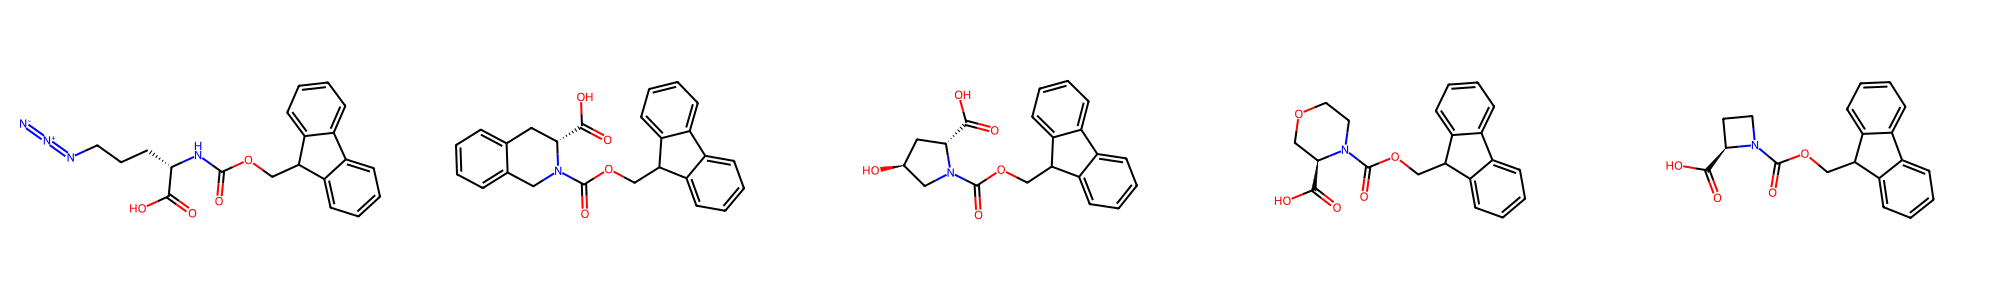

In [18]:
plot_mols(bb1_freq, 5, 'bb1')

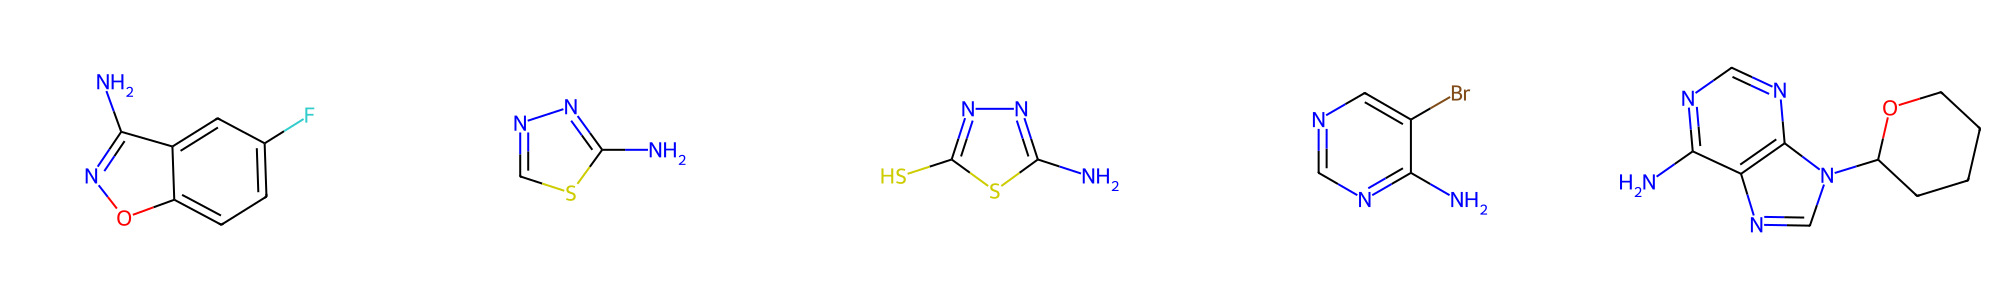

In [19]:
plot_mols(bb2_freq, 5, 'bb2')

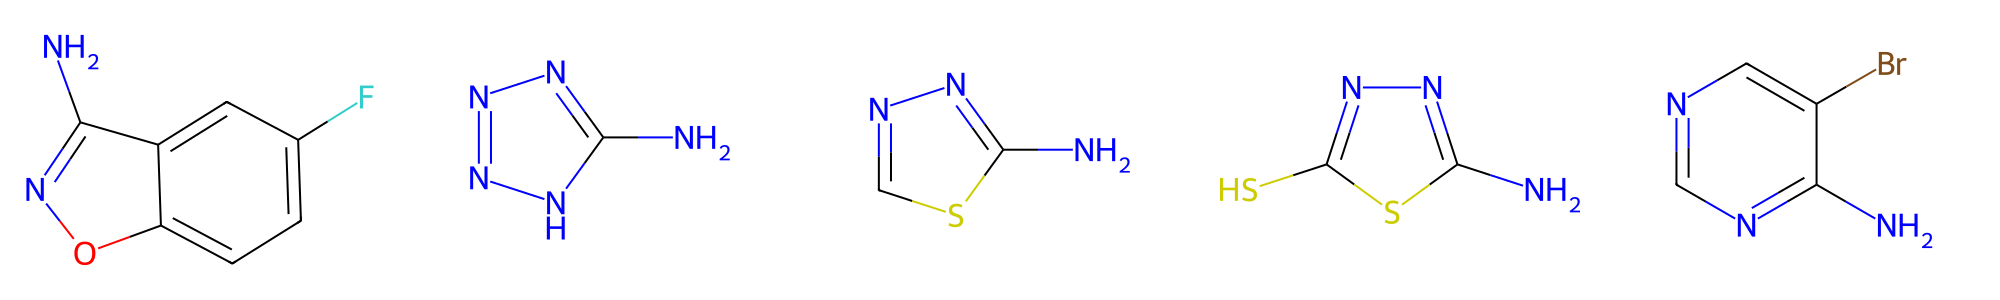

In [20]:
plot_mols(bb3_freq, 5, 'bb3')

In [21]:
df_train['bb1_length'] = df_train['buildingblock1_smiles'].apply(len)
df_train['bb2_length'] = df_train['buildingblock2_smiles'].apply(len)
df_train['bb3_length'] = df_train['buildingblock3_smiles'].apply(len)
df_train['molecule_length'] = df_train['molecule_smiles'].apply(len)

In [22]:
df_train

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_length,bb2_length,bb3_length,molecule_length
0,291776364,O=C(O)[C@H]1COCCN1C(=O)OCC1c2ccccc2-c2ccccc21,Nc1ccc(-n2cccc2)cc1,NCc1cn2cc(Cl)ccc2n1,O=C(N[Dy])[C@H]1COCCN1c1nc(NCc2cn3cc(Cl)ccc3n2...,BRD4,0,45,19,19,72
1,51659797,Cc1cc(C)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O)...,Cc1sc(N)c(C#N)c1C,NCc1ccon1,Cc1cc(C)c(Nc2nc(NCc3ccon3)nc(Nc3sc(C)c(C)c3C#N...,HSA,0,50,17,9,65
2,52232080,Cc1cc(C)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O)...,Nc1nc(-c2ccc(Cl)c(Cl)c2)cs1,Cn1cc(C(F)F)c(CN)n1,Cc1cc(C)c(Nc2nc(NCc3nn(C)cc3C(F)F)nc(Nc3nc(-c4...,HSA,0,50,27,19,83
3,241047271,O=C(O)COC[C@H]1CCCN1C(=O)OCC1c2ccccc2-c2ccccc21,COc1cccc(-c2cc(N)on2)c1,COC(=O)c1ccnc(N)c1,COC(=O)c1ccnc(Nc2nc(Nc3cc(-c4cccc(OC)c4)no3)nc...,HSA,0,47,23,18,78
4,199416878,O=C(Nc1ccc(Cl)nc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC(C)(CN)CCC#N,CSc1nnc(CN)s1,CSc1nnc(CNc2nc(NCC(C)(C)CCC#N)nc(Nc3ccc(Cl)nc3...,sEH,0,46,14,13,62
...,...,...,...,...,...,...,...,...,...,...,...
3179807,295243165,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nnc(S)s1,NCc1cnc(-c2ccccc2)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cnc(-c3ccccc3)s2...,HSA,1,55,11,20,75
3179808,295243852,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cc1cc(N)n[nH]1,Cc1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,HSA,1,55,8,14,67
3179809,295244088,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cl.Cn1cc(N)ccc1=O,Cn1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,BRD4,1,55,8,17,67
3179810,295244440,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,NCCc1nccc(C2CC2)n1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCCc2nccc(C3CC3)n2)n...,HSA,1,55,8,18,70


In [23]:
df_train[['buildingblock1_smiles','bb1_length','binds']].groupby(['buildingblock1_smiles','bb1_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock1_smiles,bb1_length,
O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,45,260846
O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,53,164425
CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,43,36478
CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,50,32566
O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,46,30457
...,...,...
O=C(Nc1c(Cl)c(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c2ccccc21,54,55
O=C(Nc1cc(Cl)nc(C(=O)O)c1Cl)OCC1c2ccccc2-c2ccccc21,50,51
O=C(Nc1c(Br)cc(C(=O)O)cc1Br)OCC1c2ccccc2-c2ccccc21,50,45


In [24]:
df_train[['buildingblock2_smiles','bb2_length','binds']].groupby(['buildingblock2_smiles','bb2_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock2_smiles,bb2_length,
Cl.Cl.NCc1cncc(F)c1,19,64213
Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],31,56276
Cl.NCc1cnc2n1CCOC2,18,30862
NCCC1CSC1,9,28190
CCOC(=O)c1ncccc1N,17,26121
...,...,...
Cl.Nc1ccc2cccnc2c1,18,226
Cl.NCC1CC12CCOCC2,17,212
Nc1ccc2cc(Br)ccc2c1,19,160


In [25]:
df_train[['buildingblock3_smiles','bb3_length','binds']].groupby(['buildingblock3_smiles','bb3_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
buildingblock3_smiles,bb3_length,
Cc1cc2cc(CN)ccc2[nH]1,21,58844
Cl.Cn1cc(N)ccc1=O,17,34174
Cl.Cl.NCc1cncc(F)c1,19,22707
Nc1ccc2c(c1)CNC2=O,18,16993
Cl.NCC12CC3CC(CC(C3)C1)C2,25,15130
...,...,...
Cl.N#CC1(NC(=O)CN)CC1,21,26
Nc1ncccc1CO,11,23
Nc1ccc(O)cn1,12,13


In [26]:
df_train[['id','molecule_length','binds']].groupby(['id','molecule_length']).agg(sum).sort_values(by='binds', ascending=False)

,,binds
id,molecule_length,
117148231,72,1
83553080,84,1
248581191,83,1
248581252,79,1
83551247,67,1
...,...,...
124865919,78,0
124865785,79,0
124865740,83,0


In [27]:
correlation_lengths = df_train[['bb1_length', 'bb2_length', 'bb3_length', 'molecule_length', 'binds']].corr()

print("Correlation between molecule lengths and binds:\n", correlation_lengths)

Correlation between molecule lengths and binds:
                  bb1_length  bb2_length  bb3_length  molecule_length     binds
bb1_length         1.000000    0.015829    0.007649         0.574647 -0.084767
bb2_length         0.015829    1.000000   -0.000721         0.558004  0.007739
bb3_length         0.007649   -0.000721    1.000000         0.534093  0.000734
molecule_length    0.574647    0.558004    0.534093         1.000000 -0.047533
binds             -0.084767    0.007739    0.000734        -0.047533  1.000000


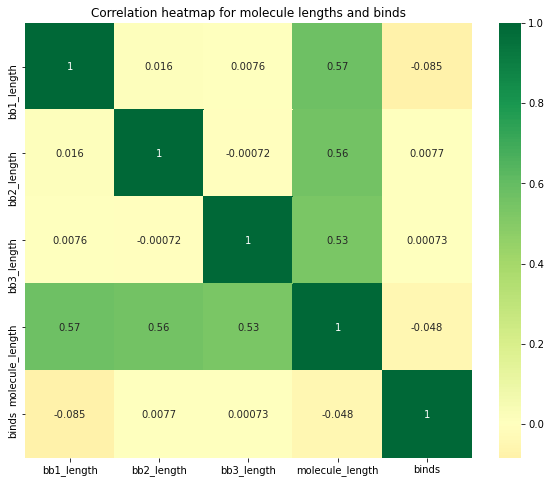

In [28]:
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_lengths, annot=True, cmap="RdYlGn", center=0)
# Add title
plt.title('Correlation heatmap for molecule lengths and binds')

# Show the heatmap
plt.show()

In [29]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [30]:
from rdkit import Chem
from joblib import Parallel, delayed
import pandas as pd

# Define the function for parallel processing
def smiles_to_mol(smiles):
    return Chem.MolFromSmiles(smiles)

# Use joblib's Parallel to convert SMILES in parallel
df_train['molecule'] = Parallel(n_jobs=-1)(delayed(smiles_to_mol)(smiles) for smiles in df_train['molecule_smiles'])

In [31]:
from tqdm import tqdm

# Define the fingerprint generation function
def generate_ecfp(molecule, radius=2, bits=1024):
    if molecule is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(molecule, radius=radius, nBits=bits))

# Use tqdm for progress tracking
tqdm.pandas()

# Use Parallel with joblib to process fingerprints in parallel
df_train['ecfp'] = Parallel(n_jobs=-1)(delayed(generate_ecfp)(mol) for mol in tqdm(df_train['molecule']))

100%|██████████| 3179812/3179812 [11:04<00:00, 4785.95it/s] 


In [32]:
df_train

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,bb1_length,bb2_length,bb3_length,molecule_length,molecule,ecfp
0,291776364,O=C(O)[C@H]1COCCN1C(=O)OCC1c2ccccc2-c2ccccc21,Nc1ccc(-n2cccc2)cc1,NCc1cn2cc(Cl)ccc2n1,O=C(N[Dy])[C@H]1COCCN1c1nc(NCc2cn3cc(Cl)ccc3n2...,BRD4,0,45,19,19,72,<rdkit.Chem.rdchem.Mol object at 0x2b7b85edc720>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,51659797,Cc1cc(C)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O)...,Cc1sc(N)c(C#N)c1C,NCc1ccon1,Cc1cc(C)c(Nc2nc(NCc3ccon3)nc(Nc3sc(C)c(C)c3C#N...,HSA,0,50,17,9,65,<rdkit.Chem.rdchem.Mol object at 0x2b7b85ed47c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
2,52232080,Cc1cc(C)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O)...,Nc1nc(-c2ccc(Cl)c(Cl)c2)cs1,Cn1cc(C(F)F)c(CN)n1,Cc1cc(C)c(Nc2nc(NCc3nn(C)cc3C(F)F)nc(Nc3nc(-c4...,HSA,0,50,27,19,83,<rdkit.Chem.rdchem.Mol object at 0x2b7b85ed4860>,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,241047271,O=C(O)COC[C@H]1CCCN1C(=O)OCC1c2ccccc2-c2ccccc21,COc1cccc(-c2cc(N)on2)c1,COC(=O)c1ccnc(N)c1,COC(=O)c1ccnc(Nc2nc(Nc3cc(-c4cccc(OC)c4)no3)nc...,HSA,0,47,23,18,78,<rdkit.Chem.rdchem.Mol object at 0x2b7b85ed4f90>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,199416878,O=C(Nc1ccc(Cl)nc1C(=O)O)OCC1c2ccccc2-c2ccccc21,CC(C)(CN)CCC#N,CSc1nnc(CN)s1,CSc1nnc(CNc2nc(NCC(C)(C)CCC#N)nc(Nc3ccc(Cl)nc3...,sEH,0,46,14,13,62,<rdkit.Chem.rdchem.Mol object at 0x2b7b85edc220>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179807,295243165,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nnc(S)s1,NCc1cnc(-c2ccccc2)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cnc(-c3ccccc3)s2...,HSA,1,55,11,20,75,<rdkit.Chem.rdchem.Mol object at 0x2b7cefc51db0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179808,295243852,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cc1cc(N)n[nH]1,Cc1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,HSA,1,55,8,14,67,<rdkit.Chem.rdchem.Mol object at 0x2b7cefc51d60>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179809,295244088,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,Cl.Cn1cc(N)ccc1=O,Cn1cc(Nc2nc(Nc3nncs3)nc(N[C@@H](CCCN=[N+]=[N-]...,BRD4,1,55,8,17,67,<rdkit.Chem.rdchem.Mol object at 0x2b7cefc51d10>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3179810,295244440,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1nncs1,NCCc1nccc(C2CC2)n1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCCc2nccc(C3CC3)n2)n...,HSA,1,55,8,18,70,<rdkit.Chem.rdchem.Mol object at 0x2b7cefc51cc0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [45]:
# X_train = [ecfp + protein for ecfp, protein in zip(df_train['ecfp'].tolist(), protein_onehot.tolist())]
# X_train_idx = np.arange(len(df_train))
# y_train = df_train['binds'].tolist()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train['binds'].tolist(), test_size=0.2, random_state=42)

In [62]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [71]:
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
from tqdm import tqdm
#from tqdm.notebook import tqdm  # For progress bar

# OneHotEncode the 'protein_name' column
onehot_encoder = OneHotEncoder(sparse=False)  # Use sparse=False for dense matrix

In [74]:
protein_onehot_sub = onehot_encoder.fit_transform(X_train_sub['protein_name'].values.reshape(-1, 1))

In [77]:
protein_onehot_val = onehot_encoder.transform(X_val['protein_name'].values.reshape(-1, 1))

In [75]:
def batch_generator(df, protein_onehot, batch_size=100000):
    n = len(df)
    for i in range(0, n, batch_size):
        X_batch = ([ecfp + list(protein) for ecfp, protein in zip(df['ecfp'].tolist()[i:i+batch_size], protein_onehot[i:i+batch_size])])
        y_batch = df['binds'].tolist()[i:i+batch_size]        
        yield np.array(X_batch), np.array(y_batch)

In [76]:
from tqdm import tqdm  # For the progress bar

# Initialize the RandomForestClassifier model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    xgb_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(xgb_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of XGBoost Classifier: {map_score:.2f}")

100%|██████████| 21/21 [05:43<00:00, 16.36s/it]


In [80]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    rf_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(rf_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of Random Forests: {map_score:.2f}")

100%|██████████| 6/6 [01:26<00:00, 14.50s/it]


Mean Average Precision (mAP) of Random Forests: 0.96


In [81]:
catboost_model = CatBoostClassifier(iterations=100, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    catboost_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(catboost_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of Random Forests: {map_score:.2f}")

  0%|          | 0/21 [00:00<?, ?it/s]

Learning rate set to 0.5
0:	learn: 0.5638042	total: 111ms	remaining: 11s
1:	learn: 0.5048448	total: 147ms	remaining: 7.19s
2:	learn: 0.4763990	total: 172ms	remaining: 5.57s
3:	learn: 0.4589432	total: 196ms	remaining: 4.7s
4:	learn: 0.4466124	total: 215ms	remaining: 4.09s
5:	learn: 0.4359728	total: 247ms	remaining: 3.88s
6:	learn: 0.4220289	total: 269ms	remaining: 3.57s
7:	learn: 0.4142412	total: 289ms	remaining: 3.32s
8:	learn: 0.4062769	total: 309ms	remaining: 3.12s
9:	learn: 0.3997805	total: 330ms	remaining: 2.97s
10:	learn: 0.3890364	total: 370ms	remaining: 2.99s
11:	learn: 0.3816984	total: 391ms	remaining: 2.86s
12:	learn: 0.3740541	total: 412ms	remaining: 2.76s
13:	learn: 0.3645176	total: 435ms	remaining: 2.67s
14:	learn: 0.3580684	total: 457ms	remaining: 2.59s
15:	learn: 0.3542673	total: 495ms	remaining: 2.6s
16:	learn: 0.3515330	total: 514ms	remaining: 2.51s
17:	learn: 0.3472076	total: 536ms	remaining: 2.44s
18:	learn: 0.3435532	total: 555ms	remaining: 2.37s
19:	learn: 0.3391786

  5%|▍         | 1/21 [00:46<15:35, 46.79s/it]

94:	learn: 0.2214247	total: 2.23s	remaining: 118ms
95:	learn: 0.2209678	total: 2.25s	remaining: 94ms
96:	learn: 0.2195807	total: 2.28s	remaining: 70.4ms
97:	learn: 0.2187799	total: 2.3s	remaining: 46.9ms
98:	learn: 0.2181498	total: 2.32s	remaining: 23.4ms
99:	learn: 0.2176279	total: 2.34s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5676689	total: 60.4ms	remaining: 5.97s
1:	learn: 0.5170812	total: 91.8ms	remaining: 4.5s
2:	learn: 0.4846314	total: 119ms	remaining: 3.84s
3:	learn: 0.4624994	total: 141ms	remaining: 3.38s
4:	learn: 0.4493406	total: 161ms	remaining: 3.05s
5:	learn: 0.4350505	total: 196ms	remaining: 3.07s
6:	learn: 0.4256551	total: 216ms	remaining: 2.87s
7:	learn: 0.4144313	total: 237ms	remaining: 2.73s
8:	learn: 0.4086739	total: 258ms	remaining: 2.61s
9:	learn: 0.4035796	total: 277ms	remaining: 2.49s
10:	learn: 0.3991045	total: 297ms	remaining: 2.4s
11:	learn: 0.3868038	total: 335ms	remaining: 2.46s
12:	learn: 0.3812857	total: 356ms	remaining: 2.38s
13:	learn: 0.3739

 10%|▉         | 2/21 [03:13<33:21, 105.36s/it]

97:	learn: 0.2141965	total: 2.29s	remaining: 46.7ms
98:	learn: 0.2135944	total: 2.31s	remaining: 23.3ms
99:	learn: 0.2130766	total: 2.33s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5641232	total: 62.6ms	remaining: 6.19s
1:	learn: 0.5139090	total: 101ms	remaining: 4.93s
2:	learn: 0.4842140	total: 130ms	remaining: 4.2s
3:	learn: 0.4649191	total: 167ms	remaining: 4.02s
4:	learn: 0.4476651	total: 191ms	remaining: 3.64s
5:	learn: 0.4383393	total: 214ms	remaining: 3.35s
6:	learn: 0.4294882	total: 235ms	remaining: 3.13s
7:	learn: 0.4175307	total: 257ms	remaining: 2.96s
8:	learn: 0.4058430	total: 281ms	remaining: 2.84s
9:	learn: 0.3976782	total: 318ms	remaining: 2.86s
10:	learn: 0.3882443	total: 339ms	remaining: 2.74s
11:	learn: 0.3812034	total: 359ms	remaining: 2.63s
12:	learn: 0.3757546	total: 380ms	remaining: 2.54s
13:	learn: 0.3691879	total: 400ms	remaining: 2.46s
14:	learn: 0.3644398	total: 420ms	remaining: 2.38s
15:	learn: 0.3602978	total: 458ms	remaining: 2.4s
16:	learn: 0.3549

 14%|█▍        | 3/21 [03:58<23:25, 78.10s/it] 

Learning rate set to 0.5
0:	learn: 0.5669749	total: 54.1ms	remaining: 5.36s
1:	learn: 0.5099184	total: 87.2ms	remaining: 4.27s
2:	learn: 0.4877506	total: 113ms	remaining: 3.64s
3:	learn: 0.4642702	total: 159ms	remaining: 3.83s
4:	learn: 0.4483328	total: 182ms	remaining: 3.46s
5:	learn: 0.4335267	total: 204ms	remaining: 3.2s
6:	learn: 0.4215133	total: 243ms	remaining: 3.22s
7:	learn: 0.4134997	total: 263ms	remaining: 3.03s
8:	learn: 0.4070397	total: 284ms	remaining: 2.87s
9:	learn: 0.3979951	total: 305ms	remaining: 2.75s
10:	learn: 0.3902434	total: 328ms	remaining: 2.65s
11:	learn: 0.3824034	total: 365ms	remaining: 2.68s
12:	learn: 0.3763486	total: 385ms	remaining: 2.57s
13:	learn: 0.3654593	total: 406ms	remaining: 2.5s
14:	learn: 0.3601546	total: 426ms	remaining: 2.41s
15:	learn: 0.3554178	total: 446ms	remaining: 2.34s
16:	learn: 0.3504360	total: 481ms	remaining: 2.35s
17:	learn: 0.3457742	total: 501ms	remaining: 2.28s
18:	learn: 0.3425037	total: 519ms	remaining: 2.21s
19:	learn: 0.339

 19%|█▉        | 4/21 [04:44<18:29, 65.26s/it]

97:	learn: 0.2153717	total: 2.3s	remaining: 46.9ms
98:	learn: 0.2148076	total: 2.32s	remaining: 23.4ms
99:	learn: 0.2140610	total: 2.34s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5660105	total: 44ms	remaining: 4.35s
1:	learn: 0.5153291	total: 78.5ms	remaining: 3.85s
2:	learn: 0.4818321	total: 121ms	remaining: 3.92s
3:	learn: 0.4624309	total: 143ms	remaining: 3.44s
4:	learn: 0.4474094	total: 166ms	remaining: 3.15s
5:	learn: 0.4335739	total: 186ms	remaining: 2.91s
6:	learn: 0.4242656	total: 205ms	remaining: 2.73s
7:	learn: 0.4123738	total: 249ms	remaining: 2.87s
8:	learn: 0.4048171	total: 275ms	remaining: 2.78s
9:	learn: 0.3952066	total: 301ms	remaining: 2.71s
10:	learn: 0.3887236	total: 340ms	remaining: 2.75s
11:	learn: 0.3834624	total: 362ms	remaining: 2.65s
12:	learn: 0.3766635	total: 383ms	remaining: 2.56s
13:	learn: 0.3702203	total: 403ms	remaining: 2.48s
14:	learn: 0.3632716	total: 424ms	remaining: 2.4s
15:	learn: 0.3584001	total: 457ms	remaining: 2.4s
16:	learn: 0.354218

 24%|██▍       | 5/21 [05:28<15:24, 57.78s/it]

99:	learn: 0.2128831	total: 2.37s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5655429	total: 52.6ms	remaining: 5.21s
1:	learn: 0.5080864	total: 87.1ms	remaining: 4.27s
2:	learn: 0.4843133	total: 112ms	remaining: 3.62s
3:	learn: 0.4657325	total: 137ms	remaining: 3.29s
4:	learn: 0.4492373	total: 159ms	remaining: 3.02s
5:	learn: 0.4328263	total: 181ms	remaining: 2.83s
6:	learn: 0.4225786	total: 218ms	remaining: 2.9s
7:	learn: 0.4136296	total: 241ms	remaining: 2.77s
8:	learn: 0.3998745	total: 263ms	remaining: 2.66s
9:	learn: 0.3931600	total: 283ms	remaining: 2.55s
10:	learn: 0.3851145	total: 304ms	remaining: 2.46s
11:	learn: 0.3793985	total: 324ms	remaining: 2.37s
12:	learn: 0.3738401	total: 358ms	remaining: 2.4s
13:	learn: 0.3675326	total: 378ms	remaining: 2.32s
14:	learn: 0.3630481	total: 399ms	remaining: 2.26s
15:	learn: 0.3562573	total: 420ms	remaining: 2.2s
16:	learn: 0.3532133	total: 440ms	remaining: 2.15s
17:	learn: 0.3477013	total: 489ms	remaining: 2.23s
18:	learn: 0.344876

 29%|██▊       | 6/21 [06:13<13:19, 53.28s/it]

95:	learn: 0.2169415	total: 2.28s	remaining: 94.9ms
96:	learn: 0.2161713	total: 2.3s	remaining: 71.1ms
97:	learn: 0.2155071	total: 2.32s	remaining: 47.3ms
98:	learn: 0.2149074	total: 2.34s	remaining: 23.6ms
99:	learn: 0.2143548	total: 2.35s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5635215	total: 38.8ms	remaining: 3.85s
1:	learn: 0.5113815	total: 66.1ms	remaining: 3.24s
2:	learn: 0.4864855	total: 90.2ms	remaining: 2.92s
3:	learn: 0.4686175	total: 113ms	remaining: 2.71s
4:	learn: 0.4540871	total: 135ms	remaining: 2.57s
5:	learn: 0.4436868	total: 157ms	remaining: 2.46s
6:	learn: 0.4320473	total: 178ms	remaining: 2.37s
7:	learn: 0.4191375	total: 202ms	remaining: 2.32s
8:	learn: 0.4119838	total: 221ms	remaining: 2.24s
9:	learn: 0.4052978	total: 242ms	remaining: 2.17s
10:	learn: 0.3939074	total: 262ms	remaining: 2.12s
11:	learn: 0.3891451	total: 282ms	remaining: 2.06s
12:	learn: 0.3826641	total: 309ms	remaining: 2.07s
13:	learn: 0.3785129	total: 329ms	remaining: 2.02s
14:	learn: 0

 33%|███▎      | 7/21 [06:58<11:46, 50.45s/it]

98:	learn: 0.2179268	total: 2.29s	remaining: 23.1ms
99:	learn: 0.2173045	total: 2.31s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5642288	total: 26.8ms	remaining: 2.66s
1:	learn: 0.5152752	total: 51.5ms	remaining: 2.52s
2:	learn: 0.4879318	total: 74.7ms	remaining: 2.42s
3:	learn: 0.4701582	total: 102ms	remaining: 2.44s
4:	learn: 0.4557941	total: 123ms	remaining: 2.34s
5:	learn: 0.4399916	total: 147ms	remaining: 2.3s
6:	learn: 0.4301316	total: 167ms	remaining: 2.22s
7:	learn: 0.4166665	total: 188ms	remaining: 2.17s
8:	learn: 0.4074172	total: 210ms	remaining: 2.12s
9:	learn: 0.3989921	total: 231ms	remaining: 2.08s
10:	learn: 0.3880309	total: 252ms	remaining: 2.03s
11:	learn: 0.3805983	total: 272ms	remaining: 2s
12:	learn: 0.3726558	total: 292ms	remaining: 1.96s
13:	learn: 0.3671380	total: 312ms	remaining: 1.91s
14:	learn: 0.3591203	total: 334ms	remaining: 1.89s
15:	learn: 0.3532778	total: 355ms	remaining: 1.86s
16:	learn: 0.3486943	total: 375ms	remaining: 1.83s
17:	learn: 0.34491

 38%|███▊      | 8/21 [07:42<10:29, 48.45s/it]

94:	learn: 0.2191798	total: 2.02s	remaining: 106ms
95:	learn: 0.2184075	total: 2.04s	remaining: 85.1ms
96:	learn: 0.2177362	total: 2.06s	remaining: 63.8ms
97:	learn: 0.2167361	total: 2.08s	remaining: 42.5ms
98:	learn: 0.2160909	total: 2.1s	remaining: 21.3ms
99:	learn: 0.2152499	total: 2.13s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5643865	total: 39.9ms	remaining: 3.95s
1:	learn: 0.5100401	total: 72.5ms	remaining: 3.55s
2:	learn: 0.4778626	total: 97.4ms	remaining: 3.15s
3:	learn: 0.4579646	total: 121ms	remaining: 2.9s
4:	learn: 0.4414993	total: 146ms	remaining: 2.77s
5:	learn: 0.4311296	total: 166ms	remaining: 2.6s
6:	learn: 0.4219342	total: 187ms	remaining: 2.49s
7:	learn: 0.4071814	total: 209ms	remaining: 2.4s
8:	learn: 0.3959126	total: 230ms	remaining: 2.33s
9:	learn: 0.3884141	total: 256ms	remaining: 2.3s
10:	learn: 0.3822172	total: 276ms	remaining: 2.23s
11:	learn: 0.3769634	total: 296ms	remaining: 2.17s
12:	learn: 0.3694339	total: 317ms	remaining: 2.12s
13:	learn: 0.364

 43%|████▎     | 9/21 [08:26<09:27, 47.27s/it]

Learning rate set to 0.5
0:	learn: 0.5691169	total: 41.4ms	remaining: 4.1s
1:	learn: 0.5106193	total: 76.5ms	remaining: 3.75s
2:	learn: 0.4862193	total: 104ms	remaining: 3.35s
3:	learn: 0.4666889	total: 127ms	remaining: 3.06s
4:	learn: 0.4537033	total: 148ms	remaining: 2.81s
5:	learn: 0.4390402	total: 175ms	remaining: 2.75s
6:	learn: 0.4248647	total: 199ms	remaining: 2.64s
7:	learn: 0.4169469	total: 220ms	remaining: 2.54s
8:	learn: 0.4093684	total: 244ms	remaining: 2.46s
9:	learn: 0.4014289	total: 265ms	remaining: 2.39s
10:	learn: 0.3952846	total: 286ms	remaining: 2.32s
11:	learn: 0.3895341	total: 316ms	remaining: 2.32s
12:	learn: 0.3795813	total: 340ms	remaining: 2.27s
13:	learn: 0.3728585	total: 364ms	remaining: 2.23s
14:	learn: 0.3643823	total: 387ms	remaining: 2.19s
15:	learn: 0.3580310	total: 409ms	remaining: 2.15s
16:	learn: 0.3541986	total: 442ms	remaining: 2.16s
17:	learn: 0.3482846	total: 465ms	remaining: 2.12s
18:	learn: 0.3452089	total: 486ms	remaining: 2.07s
19:	learn: 0.34

 48%|████▊     | 10/21 [09:10<08:26, 46.06s/it]

98:	learn: 0.2161945	total: 2.24s	remaining: 22.6ms
99:	learn: 0.2157054	total: 2.26s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5645223	total: 36.1ms	remaining: 3.58s
1:	learn: 0.5085525	total: 66.4ms	remaining: 3.25s
2:	learn: 0.4806644	total: 90.1ms	remaining: 2.91s
3:	learn: 0.4594066	total: 112ms	remaining: 2.7s
4:	learn: 0.4453927	total: 136ms	remaining: 2.57s
5:	learn: 0.4349716	total: 155ms	remaining: 2.43s
6:	learn: 0.4238058	total: 175ms	remaining: 2.33s
7:	learn: 0.4148129	total: 195ms	remaining: 2.24s
8:	learn: 0.4063962	total: 216ms	remaining: 2.18s
9:	learn: 0.3959855	total: 237ms	remaining: 2.14s
10:	learn: 0.3883689	total: 257ms	remaining: 2.08s
11:	learn: 0.3821991	total: 277ms	remaining: 2.03s
12:	learn: 0.3757348	total: 298ms	remaining: 1.99s
13:	learn: 0.3710689	total: 319ms	remaining: 1.96s
14:	learn: 0.3680182	total: 338ms	remaining: 1.92s
15:	learn: 0.3620489	total: 360ms	remaining: 1.89s
16:	learn: 0.3525309	total: 381ms	remaining: 1.86s
17:	learn: 0.34

 52%|█████▏    | 11/21 [09:54<07:35, 45.52s/it]

Learning rate set to 0.5
0:	learn: 0.5664978	total: 42.5ms	remaining: 4.2s
1:	learn: 0.5104488	total: 75.5ms	remaining: 3.7s
2:	learn: 0.4823929	total: 101ms	remaining: 3.28s
3:	learn: 0.4620008	total: 126ms	remaining: 3.03s
4:	learn: 0.4464113	total: 147ms	remaining: 2.79s
5:	learn: 0.4345037	total: 167ms	remaining: 2.62s
6:	learn: 0.4274401	total: 187ms	remaining: 2.49s
7:	learn: 0.4178056	total: 208ms	remaining: 2.39s
8:	learn: 0.4077889	total: 228ms	remaining: 2.3s
9:	learn: 0.3956327	total: 249ms	remaining: 2.24s
10:	learn: 0.3894122	total: 270ms	remaining: 2.18s
11:	learn: 0.3821267	total: 294ms	remaining: 2.15s
12:	learn: 0.3761337	total: 316ms	remaining: 2.12s
13:	learn: 0.3716588	total: 337ms	remaining: 2.07s
14:	learn: 0.3665043	total: 358ms	remaining: 2.03s
15:	learn: 0.3582700	total: 382ms	remaining: 2s
16:	learn: 0.3522760	total: 404ms	remaining: 1.97s
17:	learn: 0.3466161	total: 427ms	remaining: 1.95s
18:	learn: 0.3424421	total: 449ms	remaining: 1.91s
19:	learn: 0.3391130

 57%|█████▋    | 12/21 [10:38<06:45, 45.06s/it]

94:	learn: 0.2190961	total: 1.98s	remaining: 104ms
95:	learn: 0.2185452	total: 2s	remaining: 83.3ms
96:	learn: 0.2179296	total: 2.02s	remaining: 62.4ms
97:	learn: 0.2172352	total: 2.04s	remaining: 41.6ms
98:	learn: 0.2166707	total: 2.06s	remaining: 20.8ms
99:	learn: 0.2159663	total: 2.08s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5664993	total: 30.8ms	remaining: 3.05s
1:	learn: 0.5167091	total: 72.2ms	remaining: 3.54s
2:	learn: 0.4882211	total: 96.7ms	remaining: 3.13s
3:	learn: 0.4700724	total: 119ms	remaining: 2.86s
4:	learn: 0.4549292	total: 140ms	remaining: 2.67s
5:	learn: 0.4359295	total: 164ms	remaining: 2.56s
6:	learn: 0.4262055	total: 202ms	remaining: 2.69s
7:	learn: 0.4146504	total: 224ms	remaining: 2.58s
8:	learn: 0.4071231	total: 244ms	remaining: 2.47s
9:	learn: 0.3999414	total: 266ms	remaining: 2.39s
10:	learn: 0.3941869	total: 289ms	remaining: 2.33s
11:	learn: 0.3849334	total: 309ms	remaining: 2.27s
12:	learn: 0.3785361	total: 331ms	remaining: 2.22s
13:	learn: 0.3

 62%|██████▏   | 13/21 [11:23<05:59, 44.92s/it]

95:	learn: 0.2175876	total: 2.27s	remaining: 94.8ms
96:	learn: 0.2170022	total: 2.29s	remaining: 71ms
97:	learn: 0.2164570	total: 2.31s	remaining: 47.3ms
98:	learn: 0.2157535	total: 2.34s	remaining: 23.6ms
99:	learn: 0.2151234	total: 2.36s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5692678	total: 56.8ms	remaining: 5.63s
1:	learn: 0.5209011	total: 85.1ms	remaining: 4.17s
2:	learn: 0.4823790	total: 115ms	remaining: 3.71s
3:	learn: 0.4639198	total: 138ms	remaining: 3.3s
4:	learn: 0.4453068	total: 177ms	remaining: 3.36s
5:	learn: 0.4365920	total: 198ms	remaining: 3.1s
6:	learn: 0.4249426	total: 219ms	remaining: 2.91s
7:	learn: 0.4140538	total: 242ms	remaining: 2.78s
8:	learn: 0.4060016	total: 261ms	remaining: 2.64s
9:	learn: 0.3960712	total: 283ms	remaining: 2.55s
10:	learn: 0.3892108	total: 322ms	remaining: 2.6s
11:	learn: 0.3830725	total: 342ms	remaining: 2.51s
12:	learn: 0.3766608	total: 362ms	remaining: 2.42s
13:	learn: 0.3680481	total: 384ms	remaining: 2.35s
14:	learn: 0.3629

 67%|██████▋   | 14/21 [12:08<05:14, 44.92s/it]

Learning rate set to 0.5
0:	learn: 0.5705681	total: 32.6ms	remaining: 3.23s
1:	learn: 0.5197851	total: 79.1ms	remaining: 3.88s
2:	learn: 0.4934927	total: 101ms	remaining: 3.28s
3:	learn: 0.4666558	total: 123ms	remaining: 2.96s
4:	learn: 0.4525173	total: 149ms	remaining: 2.83s
5:	learn: 0.4384938	total: 174ms	remaining: 2.73s
6:	learn: 0.4299416	total: 216ms	remaining: 2.87s
7:	learn: 0.4215736	total: 238ms	remaining: 2.74s
8:	learn: 0.4106239	total: 260ms	remaining: 2.63s
9:	learn: 0.4042885	total: 280ms	remaining: 2.52s
10:	learn: 0.3980262	total: 300ms	remaining: 2.42s
11:	learn: 0.3899026	total: 321ms	remaining: 2.35s
12:	learn: 0.3823793	total: 359ms	remaining: 2.4s
13:	learn: 0.3769639	total: 381ms	remaining: 2.34s
14:	learn: 0.3725935	total: 403ms	remaining: 2.28s
15:	learn: 0.3675971	total: 424ms	remaining: 2.23s
16:	learn: 0.3639889	total: 445ms	remaining: 2.17s
17:	learn: 0.3579335	total: 467ms	remaining: 2.13s
18:	learn: 0.3536883	total: 506ms	remaining: 2.16s
19:	learn: 0.35

 71%|███████▏  | 15/21 [12:53<04:29, 45.00s/it]

94:	learn: 0.2194262	total: 2.27s	remaining: 119ms
95:	learn: 0.2188426	total: 2.29s	remaining: 95.2ms
96:	learn: 0.2181543	total: 2.31s	remaining: 71.4ms
97:	learn: 0.2174708	total: 2.33s	remaining: 47.5ms
98:	learn: 0.2165317	total: 2.35s	remaining: 23.7ms
99:	learn: 0.2159086	total: 2.38s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5683702	total: 26.6ms	remaining: 2.63s
1:	learn: 0.5193733	total: 77.4ms	remaining: 3.79s
2:	learn: 0.4889083	total: 100ms	remaining: 3.25s
3:	learn: 0.4689746	total: 124ms	remaining: 2.97s
4:	learn: 0.4538537	total: 147ms	remaining: 2.79s
5:	learn: 0.4387775	total: 170ms	remaining: 2.66s
6:	learn: 0.4280191	total: 209ms	remaining: 2.77s
7:	learn: 0.4190360	total: 232ms	remaining: 2.67s
8:	learn: 0.4074417	total: 255ms	remaining: 2.57s
9:	learn: 0.3989139	total: 276ms	remaining: 2.49s
10:	learn: 0.3892545	total: 300ms	remaining: 2.42s
11:	learn: 0.3832193	total: 322ms	remaining: 2.36s
12:	learn: 0.3740483	total: 358ms	remaining: 2.4s
13:	learn: 0.

 76%|███████▌  | 16/21 [13:37<03:44, 44.83s/it]

95:	learn: 0.2176580	total: 2.27s	remaining: 94.6ms
96:	learn: 0.2169314	total: 2.29s	remaining: 70.8ms
97:	learn: 0.2163208	total: 2.31s	remaining: 47.1ms
98:	learn: 0.2155972	total: 2.34s	remaining: 23.7ms
99:	learn: 0.2149682	total: 2.36s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5666602	total: 32.9ms	remaining: 3.26s
1:	learn: 0.5097955	total: 76.2ms	remaining: 3.73s
2:	learn: 0.4797106	total: 99.7ms	remaining: 3.22s
3:	learn: 0.4605360	total: 121ms	remaining: 2.9s
4:	learn: 0.4443099	total: 145ms	remaining: 2.75s
5:	learn: 0.4257136	total: 169ms	remaining: 2.65s
6:	learn: 0.4158071	total: 219ms	remaining: 2.91s
7:	learn: 0.4083151	total: 243ms	remaining: 2.79s
8:	learn: 0.3941892	total: 268ms	remaining: 2.71s
9:	learn: 0.3857570	total: 318ms	remaining: 2.86s
10:	learn: 0.3787462	total: 338ms	remaining: 2.73s
11:	learn: 0.3731938	total: 360ms	remaining: 2.64s
12:	learn: 0.3667051	total: 380ms	remaining: 2.54s
13:	learn: 0.3602093	total: 419ms	remaining: 2.58s
14:	learn: 0

 81%|████████  | 17/21 [14:22<02:59, 44.83s/it]

99:	learn: 0.2127561	total: 2.44s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5698766	total: 31ms	remaining: 3.07s
1:	learn: 0.5202944	total: 56.5ms	remaining: 2.77s
2:	learn: 0.4950338	total: 79.5ms	remaining: 2.57s
3:	learn: 0.4768139	total: 101ms	remaining: 2.42s
4:	learn: 0.4616815	total: 121ms	remaining: 2.3s
5:	learn: 0.4497155	total: 143ms	remaining: 2.24s
6:	learn: 0.4394315	total: 166ms	remaining: 2.21s
7:	learn: 0.4309503	total: 187ms	remaining: 2.15s
8:	learn: 0.4230850	total: 210ms	remaining: 2.12s
9:	learn: 0.4158686	total: 233ms	remaining: 2.09s
10:	learn: 0.4109248	total: 254ms	remaining: 2.05s
11:	learn: 0.4039157	total: 276ms	remaining: 2.02s
12:	learn: 0.3967998	total: 298ms	remaining: 1.99s
13:	learn: 0.3921147	total: 320ms	remaining: 1.97s
14:	learn: 0.3789956	total: 354ms	remaining: 2.01s
15:	learn: 0.3726172	total: 375ms	remaining: 1.97s
16:	learn: 0.3609269	total: 397ms	remaining: 1.94s
17:	learn: 0.3544732	total: 417ms	remaining: 1.9s
18:	learn: 0.347974

 86%|████████▌ | 18/21 [15:06<02:13, 44.57s/it]

99:	learn: 0.2163765	total: 2.29s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5637011	total: 40.8ms	remaining: 4.04s
1:	learn: 0.5121096	total: 63ms	remaining: 3.09s
2:	learn: 0.4900150	total: 82.5ms	remaining: 2.67s
3:	learn: 0.4714554	total: 103ms	remaining: 2.47s
4:	learn: 0.4554964	total: 124ms	remaining: 2.36s
5:	learn: 0.4399626	total: 146ms	remaining: 2.29s
6:	learn: 0.4312098	total: 166ms	remaining: 2.2s
7:	learn: 0.4178300	total: 203ms	remaining: 2.34s
8:	learn: 0.4086925	total: 224ms	remaining: 2.26s
9:	learn: 0.4028133	total: 244ms	remaining: 2.2s
10:	learn: 0.3941340	total: 266ms	remaining: 2.15s
11:	learn: 0.3858655	total: 286ms	remaining: 2.1s
12:	learn: 0.3814592	total: 305ms	remaining: 2.04s
13:	learn: 0.3772088	total: 344ms	remaining: 2.11s
14:	learn: 0.3727398	total: 364ms	remaining: 2.06s
15:	learn: 0.3688772	total: 384ms	remaining: 2.02s
16:	learn: 0.3610883	total: 405ms	remaining: 1.98s
17:	learn: 0.3557487	total: 424ms	remaining: 1.93s
18:	learn: 0.3495686

 90%|█████████ | 19/21 [15:51<01:29, 44.67s/it]

94:	learn: 0.2207359	total: 2s	remaining: 105ms
95:	learn: 0.2200799	total: 2.02s	remaining: 84.3ms
96:	learn: 0.2194176	total: 2.04s	remaining: 63.2ms
97:	learn: 0.2186427	total: 2.06s	remaining: 42.1ms
98:	learn: 0.2180668	total: 2.08s	remaining: 21ms
99:	learn: 0.2173056	total: 2.1s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5638214	total: 30.7ms	remaining: 3.03s
1:	learn: 0.5120996	total: 58ms	remaining: 2.84s
2:	learn: 0.4866917	total: 95.3ms	remaining: 3.08s
3:	learn: 0.4653221	total: 118ms	remaining: 2.82s
4:	learn: 0.4517358	total: 140ms	remaining: 2.65s
5:	learn: 0.4411812	total: 162ms	remaining: 2.53s
6:	learn: 0.4268457	total: 187ms	remaining: 2.49s
7:	learn: 0.4181111	total: 211ms	remaining: 2.43s
8:	learn: 0.4112630	total: 233ms	remaining: 2.36s
9:	learn: 0.4053218	total: 256ms	remaining: 2.3s
10:	learn: 0.3983459	total: 278ms	remaining: 2.25s
11:	learn: 0.3848719	total: 301ms	remaining: 2.21s
12:	learn: 0.3782665	total: 323ms	remaining: 2.16s
13:	learn: 0.3736197

 95%|█████████▌| 20/21 [16:35<00:44, 44.64s/it]

99:	learn: 0.2160600	total: 2.27s	remaining: 0us
Learning rate set to 0.388749
0:	learn: 0.5778521	total: 36.9ms	remaining: 3.65s
1:	learn: 0.5371264	total: 57.2ms	remaining: 2.8s
2:	learn: 0.5028729	total: 74.7ms	remaining: 2.41s
3:	learn: 0.4872911	total: 90.9ms	remaining: 2.18s
4:	learn: 0.4713720	total: 106ms	remaining: 2.02s
5:	learn: 0.4548025	total: 138ms	remaining: 2.16s
6:	learn: 0.4434112	total: 153ms	remaining: 2.03s
7:	learn: 0.4352430	total: 169ms	remaining: 1.94s
8:	learn: 0.4278276	total: 183ms	remaining: 1.85s
9:	learn: 0.4178123	total: 199ms	remaining: 1.79s
10:	learn: 0.4078706	total: 215ms	remaining: 1.74s
11:	learn: 0.4028810	total: 247ms	remaining: 1.81s
12:	learn: 0.3982250	total: 261ms	remaining: 1.75s
13:	learn: 0.3932767	total: 275ms	remaining: 1.69s
14:	learn: 0.3894272	total: 289ms	remaining: 1.64s
15:	learn: 0.3835173	total: 304ms	remaining: 1.59s
16:	learn: 0.3790891	total: 318ms	remaining: 1.55s
17:	learn: 0.3750640	total: 333ms	remaining: 1.52s
18:	learn:

100%|██████████| 21/21 [16:52<00:00, 48.24s/it]

95:	learn: 0.2200290	total: 1.63s	remaining: 67.7ms
96:	learn: 0.2189914	total: 1.64s	remaining: 50.7ms
97:	learn: 0.2181427	total: 1.66s	remaining: 33.8ms
98:	learn: 0.2167956	total: 1.67s	remaining: 16.9ms
99:	learn: 0.2160675	total: 1.68s	remaining: 0us



100%|██████████| 6/6 [03:30<00:00, 35.14s/it]


Mean Average Precision (mAP) of Random Forests: 0.96


In [82]:
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model using batches
for X_batch, y_batch in tqdm(batch_generator(X_train_sub, protein_onehot_sub), total=len(X_train_sub)//100000+1):
    lr_model.fit(X_batch, y_batch)
y_pred_proba = []
for X_batch, y_batch in tqdm(batch_generator(X_val, protein_onehot_val), total=len(X_val)//100000+1):
    y_pred_proba.extend(lr_model.predict_proba(X_batch)[:, 1])
map_score = average_precision_score(y_val, y_pred_proba)
print(f"Mean Average Precision (mAP) of Logistic Regression: {map_score:.2f}")

100%|██████████| 6/6 [00:58<00:00,  9.81s/it]


Mean Average Precision (mAP) of Logistic Regression: 0.93


In [85]:
protein_onehot_train = onehot_encoder.fit_transform(X_train['protein_name'].values.reshape(-1, 1))

In [86]:
protein_onehot_test = onehot_encoder.transform(X_test['protein_name'].values.reshape(-1, 1))

In [88]:
for X_batch, y_batch in tqdm(batch_generator(X_train, protein_onehot_train), total=len(X_train)//100000+1):
    rf_model.fit(X_batch, y_batch)
    xgb_model.fit(X_batch, y_batch)
    lr_model.fit(X_batch, y_batch)
    catboost_model.fit(X_batch, y_batch)

  0%|          | 0/26 [00:00<?, ?it/s]

Learning rate set to 0.5
0:	learn: 0.5642634	total: 23ms	remaining: 2.27s
1:	learn: 0.5088078	total: 45.7ms	remaining: 2.24s
2:	learn: 0.4801264	total: 65.8ms	remaining: 2.13s
3:	learn: 0.4592030	total: 85.8ms	remaining: 2.06s
4:	learn: 0.4464181	total: 121ms	remaining: 2.3s
5:	learn: 0.4347193	total: 143ms	remaining: 2.24s
6:	learn: 0.4255826	total: 166ms	remaining: 2.2s
7:	learn: 0.4178043	total: 186ms	remaining: 2.14s
8:	learn: 0.4080819	total: 224ms	remaining: 2.26s
9:	learn: 0.3987893	total: 245ms	remaining: 2.2s
10:	learn: 0.3884345	total: 265ms	remaining: 2.15s
11:	learn: 0.3772109	total: 287ms	remaining: 2.1s
12:	learn: 0.3704811	total: 308ms	remaining: 2.06s
13:	learn: 0.3659065	total: 328ms	remaining: 2.02s
14:	learn: 0.3605717	total: 348ms	remaining: 1.97s
15:	learn: 0.3562737	total: 383ms	remaining: 2.01s
16:	learn: 0.3509284	total: 403ms	remaining: 1.97s
17:	learn: 0.3476448	total: 423ms	remaining: 1.93s
18:	learn: 0.3447335	total: 442ms	remaining: 1.89s
19:	learn: 0.33945

  4%|▍         | 1/26 [02:53<1:12:25, 173.82s/it]

96:	learn: 0.2178666	total: 2.32s	remaining: 71.8ms
97:	learn: 0.2172035	total: 2.34s	remaining: 47.8ms
98:	learn: 0.2165517	total: 2.38s	remaining: 24ms
99:	learn: 0.2157995	total: 2.4s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5642428	total: 39.3ms	remaining: 3.9s
1:	learn: 0.5131610	total: 71.3ms	remaining: 3.49s
2:	learn: 0.4808672	total: 98.2ms	remaining: 3.18s
3:	learn: 0.4605801	total: 121ms	remaining: 2.9s
4:	learn: 0.4475410	total: 145ms	remaining: 2.75s
5:	learn: 0.4366688	total: 165ms	remaining: 2.58s
6:	learn: 0.4232652	total: 187ms	remaining: 2.48s
7:	learn: 0.4137387	total: 206ms	remaining: 2.37s
8:	learn: 0.4056541	total: 227ms	remaining: 2.29s
9:	learn: 0.3970062	total: 248ms	remaining: 2.23s
10:	learn: 0.3885752	total: 275ms	remaining: 2.22s
11:	learn: 0.3802588	total: 295ms	remaining: 2.17s
12:	learn: 0.3721852	total: 316ms	remaining: 2.12s
13:	learn: 0.3671073	total: 335ms	remaining: 2.06s
14:	learn: 0.3627983	total: 355ms	remaining: 2.01s
15:	learn: 0.3583

  8%|▊         | 2/26 [05:48<1:09:43, 174.32s/it]

Learning rate set to 0.5
0:	learn: 0.5682497	total: 28.5ms	remaining: 2.82s
1:	learn: 0.5173635	total: 54.9ms	remaining: 2.69s
2:	learn: 0.4917126	total: 78.4ms	remaining: 2.54s
3:	learn: 0.4717956	total: 99.6ms	remaining: 2.39s
4:	learn: 0.4575395	total: 121ms	remaining: 2.3s
5:	learn: 0.4438967	total: 146ms	remaining: 2.28s
6:	learn: 0.4347257	total: 165ms	remaining: 2.19s
7:	learn: 0.4226135	total: 186ms	remaining: 2.14s
8:	learn: 0.4112298	total: 207ms	remaining: 2.1s
9:	learn: 0.3981482	total: 229ms	remaining: 2.06s
10:	learn: 0.3915397	total: 249ms	remaining: 2.02s
11:	learn: 0.3842801	total: 273ms	remaining: 2s
12:	learn: 0.3780266	total: 293ms	remaining: 1.96s
13:	learn: 0.3706431	total: 313ms	remaining: 1.92s
14:	learn: 0.3637369	total: 334ms	remaining: 1.89s
15:	learn: 0.3591048	total: 354ms	remaining: 1.86s
16:	learn: 0.3548434	total: 374ms	remaining: 1.82s
17:	learn: 0.3513649	total: 393ms	remaining: 1.79s
18:	learn: 0.3445004	total: 414ms	remaining: 1.76s
19:	learn: 0.3415

 12%|█▏        | 3/26 [08:52<1:08:28, 178.62s/it]

99:	learn: 0.2144324	total: 2.21s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5652145	total: 52.9ms	remaining: 5.24s
1:	learn: 0.5142257	total: 91.6ms	remaining: 4.49s
2:	learn: 0.4856855	total: 122ms	remaining: 3.95s
3:	learn: 0.4677808	total: 148ms	remaining: 3.56s
4:	learn: 0.4543749	total: 174ms	remaining: 3.31s
5:	learn: 0.4413672	total: 196ms	remaining: 3.07s
6:	learn: 0.4312430	total: 217ms	remaining: 2.88s
7:	learn: 0.4195769	total: 242ms	remaining: 2.78s
8:	learn: 0.4106494	total: 267ms	remaining: 2.7s
9:	learn: 0.4033797	total: 288ms	remaining: 2.59s
10:	learn: 0.3978923	total: 310ms	remaining: 2.51s
11:	learn: 0.3932864	total: 329ms	remaining: 2.41s
12:	learn: 0.3856002	total: 351ms	remaining: 2.35s
13:	learn: 0.3793525	total: 379ms	remaining: 2.33s
14:	learn: 0.3683109	total: 401ms	remaining: 2.27s
15:	learn: 0.3644824	total: 420ms	remaining: 2.2s
16:	learn: 0.3598587	total: 441ms	remaining: 2.15s
17:	learn: 0.3547693	total: 462ms	remaining: 2.1s
18:	learn: 0.350132

 15%|█▌        | 4/26 [11:34<1:03:05, 172.07s/it]

Learning rate set to 0.5
0:	learn: 0.5631064	total: 43.2ms	remaining: 4.28s
1:	learn: 0.5284883	total: 73.8ms	remaining: 3.62s
2:	learn: 0.4899117	total: 108ms	remaining: 3.5s
3:	learn: 0.4713878	total: 131ms	remaining: 3.14s
4:	learn: 0.4556766	total: 152ms	remaining: 2.89s
5:	learn: 0.4381552	total: 175ms	remaining: 2.74s
6:	learn: 0.4301101	total: 196ms	remaining: 2.6s
7:	learn: 0.4192099	total: 218ms	remaining: 2.5s
8:	learn: 0.4122298	total: 238ms	remaining: 2.4s
9:	learn: 0.4065244	total: 257ms	remaining: 2.31s
10:	learn: 0.3997304	total: 277ms	remaining: 2.24s
11:	learn: 0.3945898	total: 297ms	remaining: 2.18s
12:	learn: 0.3878788	total: 318ms	remaining: 2.13s
13:	learn: 0.3807836	total: 341ms	remaining: 2.09s
14:	learn: 0.3752318	total: 360ms	remaining: 2.04s
15:	learn: 0.3656776	total: 382ms	remaining: 2s
16:	learn: 0.3624595	total: 401ms	remaining: 1.96s
17:	learn: 0.3571190	total: 421ms	remaining: 1.92s
18:	learn: 0.3524233	total: 441ms	remaining: 1.88s
19:	learn: 0.3469933	

 19%|█▉        | 5/26 [14:13<58:37, 167.50s/it]  

95:	learn: 0.2168582	total: 2.17s	remaining: 90.5ms
96:	learn: 0.2164501	total: 2.19s	remaining: 67.8ms
97:	learn: 0.2159051	total: 2.22s	remaining: 45.4ms
98:	learn: 0.2151820	total: 2.24s	remaining: 22.7ms
99:	learn: 0.2143124	total: 2.26s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5670595	total: 32.1ms	remaining: 3.18s
1:	learn: 0.5143611	total: 59.2ms	remaining: 2.9s
2:	learn: 0.4873575	total: 82.6ms	remaining: 2.67s
3:	learn: 0.4659115	total: 105ms	remaining: 2.52s
4:	learn: 0.4533269	total: 127ms	remaining: 2.41s
5:	learn: 0.4419221	total: 147ms	remaining: 2.3s
6:	learn: 0.4283262	total: 170ms	remaining: 2.26s
7:	learn: 0.4187452	total: 191ms	remaining: 2.19s
8:	learn: 0.4049606	total: 212ms	remaining: 2.14s
9:	learn: 0.3952074	total: 232ms	remaining: 2.09s
10:	learn: 0.3873701	total: 252ms	remaining: 2.04s
11:	learn: 0.3788107	total: 272ms	remaining: 2s
12:	learn: 0.3706892	total: 292ms	remaining: 1.95s
13:	learn: 0.3656010	total: 313ms	remaining: 1.92s
14:	learn: 0.361

 23%|██▎       | 6/26 [16:58<55:32, 166.64s/it]

94:	learn: 0.2183672	total: 1.99s	remaining: 105ms
95:	learn: 0.2178656	total: 2.02s	remaining: 84.4ms
96:	learn: 0.2171526	total: 2.04s	remaining: 63.3ms
97:	learn: 0.2166649	total: 2.06s	remaining: 42.1ms
98:	learn: 0.2159030	total: 2.08s	remaining: 21.1ms
99:	learn: 0.2153175	total: 2.1s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5629859	total: 36.8ms	remaining: 3.64s
1:	learn: 0.5104610	total: 66.2ms	remaining: 3.24s
2:	learn: 0.4800075	total: 91.4ms	remaining: 2.96s
3:	learn: 0.4589776	total: 117ms	remaining: 2.8s
4:	learn: 0.4433843	total: 139ms	remaining: 2.64s
5:	learn: 0.4323531	total: 159ms	remaining: 2.5s
6:	learn: 0.4232588	total: 179ms	remaining: 2.37s
7:	learn: 0.4166144	total: 198ms	remaining: 2.27s
8:	learn: 0.4042168	total: 217ms	remaining: 2.2s
9:	learn: 0.3939481	total: 237ms	remaining: 2.13s
10:	learn: 0.3869151	total: 257ms	remaining: 2.08s
11:	learn: 0.3817407	total: 279ms	remaining: 2.04s
12:	learn: 0.3754173	total: 299ms	remaining: 2s
13:	learn: 0.37085

 27%|██▋       | 7/26 [19:39<52:10, 164.76s/it]

92:	learn: 0.2176453	total: 1.99s	remaining: 150ms
93:	learn: 0.2169945	total: 2.01s	remaining: 128ms
94:	learn: 0.2163398	total: 2.03s	remaining: 107ms
95:	learn: 0.2157406	total: 2.06s	remaining: 85.7ms
96:	learn: 0.2152571	total: 2.08s	remaining: 64.2ms
97:	learn: 0.2141346	total: 2.1s	remaining: 42.8ms
98:	learn: 0.2134646	total: 2.12s	remaining: 21.4ms
99:	learn: 0.2126687	total: 2.13s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5662238	total: 45.5ms	remaining: 4.5s
1:	learn: 0.5304530	total: 76.5ms	remaining: 3.75s
2:	learn: 0.4929915	total: 103ms	remaining: 3.34s
3:	learn: 0.4765648	total: 126ms	remaining: 3.03s
4:	learn: 0.4642328	total: 163ms	remaining: 3.1s
5:	learn: 0.4438700	total: 184ms	remaining: 2.88s
6:	learn: 0.4292922	total: 204ms	remaining: 2.71s
7:	learn: 0.4198953	total: 225ms	remaining: 2.58s
8:	learn: 0.4088594	total: 247ms	remaining: 2.49s
9:	learn: 0.3986144	total: 267ms	remaining: 2.4s
10:	learn: 0.3919547	total: 298ms	remaining: 2.41s
11:	learn: 0.384

 31%|███       | 8/26 [22:19<48:59, 163.30s/it]

95:	learn: 0.2154048	total: 2.12s	remaining: 88.4ms
96:	learn: 0.2148831	total: 2.14s	remaining: 66.3ms
97:	learn: 0.2142359	total: 2.16s	remaining: 44.1ms
98:	learn: 0.2136787	total: 2.18s	remaining: 22ms
99:	learn: 0.2132327	total: 2.2s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5657953	total: 57.9ms	remaining: 5.73s
1:	learn: 0.5105917	total: 87.2ms	remaining: 4.27s
2:	learn: 0.4890329	total: 112ms	remaining: 3.63s
3:	learn: 0.4678472	total: 137ms	remaining: 3.28s
4:	learn: 0.4493733	total: 160ms	remaining: 3.03s
5:	learn: 0.4338046	total: 182ms	remaining: 2.85s
6:	learn: 0.4252828	total: 201ms	remaining: 2.68s
7:	learn: 0.4152876	total: 222ms	remaining: 2.55s
8:	learn: 0.4077614	total: 242ms	remaining: 2.44s
9:	learn: 0.3979211	total: 264ms	remaining: 2.37s
10:	learn: 0.3908189	total: 290ms	remaining: 2.35s
11:	learn: 0.3864273	total: 311ms	remaining: 2.28s
12:	learn: 0.3787955	total: 332ms	remaining: 2.22s
13:	learn: 0.3736648	total: 353ms	remaining: 2.17s
14:	learn: 0.37

 35%|███▍      | 9/26 [25:07<46:41, 164.79s/it]

Learning rate set to 0.5
0:	learn: 0.5643687	total: 43ms	remaining: 4.26s
1:	learn: 0.5111492	total: 74.5ms	remaining: 3.65s
2:	learn: 0.4852764	total: 105ms	remaining: 3.39s
3:	learn: 0.4672202	total: 128ms	remaining: 3.06s
4:	learn: 0.4524628	total: 150ms	remaining: 2.86s
5:	learn: 0.4407174	total: 170ms	remaining: 2.66s
6:	learn: 0.4240947	total: 191ms	remaining: 2.54s
7:	learn: 0.4139886	total: 212ms	remaining: 2.44s
8:	learn: 0.4067733	total: 232ms	remaining: 2.35s
9:	learn: 0.3971302	total: 255ms	remaining: 2.29s
10:	learn: 0.3870602	total: 276ms	remaining: 2.23s
11:	learn: 0.3793044	total: 296ms	remaining: 2.17s
12:	learn: 0.3746578	total: 316ms	remaining: 2.12s
13:	learn: 0.3681399	total: 337ms	remaining: 2.07s
14:	learn: 0.3632745	total: 357ms	remaining: 2.02s
15:	learn: 0.3581491	total: 380ms	remaining: 1.99s
16:	learn: 0.3513622	total: 400ms	remaining: 1.95s
17:	learn: 0.3455186	total: 420ms	remaining: 1.91s
18:	learn: 0.3414468	total: 441ms	remaining: 1.88s
19:	learn: 0.338

 38%|███▊      | 10/26 [27:54<44:03, 165.24s/it]

Learning rate set to 0.5
0:	learn: 0.5670984	total: 35.4ms	remaining: 3.5s
1:	learn: 0.5124143	total: 83.6ms	remaining: 4.1s
2:	learn: 0.4897876	total: 109ms	remaining: 3.51s
3:	learn: 0.4686594	total: 134ms	remaining: 3.21s
4:	learn: 0.4521558	total: 155ms	remaining: 2.94s
5:	learn: 0.4406735	total: 175ms	remaining: 2.74s
6:	learn: 0.4305313	total: 212ms	remaining: 2.82s
7:	learn: 0.4173129	total: 233ms	remaining: 2.68s
8:	learn: 0.4084690	total: 255ms	remaining: 2.58s
9:	learn: 0.4031804	total: 275ms	remaining: 2.48s
10:	learn: 0.3948619	total: 296ms	remaining: 2.39s
11:	learn: 0.3891522	total: 315ms	remaining: 2.31s
12:	learn: 0.3851928	total: 351ms	remaining: 2.35s
13:	learn: 0.3787044	total: 371ms	remaining: 2.28s
14:	learn: 0.3721259	total: 392ms	remaining: 2.22s
15:	learn: 0.3640726	total: 412ms	remaining: 2.16s
16:	learn: 0.3599027	total: 432ms	remaining: 2.11s
17:	learn: 0.3558187	total: 470ms	remaining: 2.14s
18:	learn: 0.3462863	total: 494ms	remaining: 2.1s
19:	learn: 0.3421

 42%|████▏     | 11/26 [30:38<41:13, 164.90s/it]

95:	learn: 0.2211829	total: 2.25s	remaining: 93.6ms
96:	learn: 0.2205302	total: 2.27s	remaining: 70.1ms
97:	learn: 0.2193461	total: 2.29s	remaining: 46.7ms
98:	learn: 0.2186853	total: 2.32s	remaining: 23.5ms
99:	learn: 0.2175575	total: 2.34s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5677536	total: 34.4ms	remaining: 3.4s
1:	learn: 0.5098494	total: 65ms	remaining: 3.19s
2:	learn: 0.4841580	total: 90.5ms	remaining: 2.92s
3:	learn: 0.4611856	total: 114ms	remaining: 2.74s
4:	learn: 0.4467437	total: 135ms	remaining: 2.57s
5:	learn: 0.4355523	total: 156ms	remaining: 2.45s
6:	learn: 0.4272720	total: 178ms	remaining: 2.37s
7:	learn: 0.4193843	total: 199ms	remaining: 2.29s
8:	learn: 0.4097884	total: 220ms	remaining: 2.22s
9:	learn: 0.3999928	total: 241ms	remaining: 2.17s
10:	learn: 0.3947198	total: 260ms	remaining: 2.1s
11:	learn: 0.3863923	total: 280ms	remaining: 2.06s
12:	learn: 0.3803087	total: 301ms	remaining: 2.02s
13:	learn: 0.3725792	total: 323ms	remaining: 1.98s
14:	learn: 0.36

 46%|████▌     | 12/26 [33:26<38:42, 165.88s/it]

97:	learn: 0.2155241	total: 2.21s	remaining: 45.2ms
98:	learn: 0.2148381	total: 2.25s	remaining: 22.7ms
99:	learn: 0.2138928	total: 2.27s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5662790	total: 33.3ms	remaining: 3.3s
1:	learn: 0.5109676	total: 79.6ms	remaining: 3.9s
2:	learn: 0.4815520	total: 105ms	remaining: 3.38s
3:	learn: 0.4612880	total: 127ms	remaining: 3.04s
4:	learn: 0.4410424	total: 147ms	remaining: 2.8s
5:	learn: 0.4300849	total: 171ms	remaining: 2.67s
6:	learn: 0.4183717	total: 192ms	remaining: 2.55s
7:	learn: 0.4106954	total: 212ms	remaining: 2.44s
8:	learn: 0.4019918	total: 232ms	remaining: 2.34s
9:	learn: 0.3932945	total: 253ms	remaining: 2.28s
10:	learn: 0.3844207	total: 291ms	remaining: 2.35s
11:	learn: 0.3741078	total: 320ms	remaining: 2.34s
12:	learn: 0.3674869	total: 344ms	remaining: 2.3s
13:	learn: 0.3614710	total: 367ms	remaining: 2.25s
14:	learn: 0.3573904	total: 406ms	remaining: 2.3s
15:	learn: 0.3495967	total: 429ms	remaining: 2.25s
16:	learn: 0.346054

 50%|█████     | 13/26 [36:09<35:46, 165.13s/it]

97:	learn: 0.2123412	total: 2.18s	remaining: 44.5ms
98:	learn: 0.2117624	total: 2.2s	remaining: 22.2ms
99:	learn: 0.2111536	total: 2.22s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5661673	total: 35.4ms	remaining: 3.5s
1:	learn: 0.5115045	total: 66.1ms	remaining: 3.24s
2:	learn: 0.4824557	total: 96.6ms	remaining: 3.12s
3:	learn: 0.4602875	total: 120ms	remaining: 2.87s
4:	learn: 0.4436817	total: 142ms	remaining: 2.71s
5:	learn: 0.4319539	total: 162ms	remaining: 2.54s
6:	learn: 0.4199900	total: 183ms	remaining: 2.43s
7:	learn: 0.4102172	total: 203ms	remaining: 2.34s
8:	learn: 0.4014303	total: 238ms	remaining: 2.41s
9:	learn: 0.3923557	total: 259ms	remaining: 2.33s
10:	learn: 0.3862201	total: 279ms	remaining: 2.26s
11:	learn: 0.3796198	total: 301ms	remaining: 2.21s
12:	learn: 0.3747076	total: 322ms	remaining: 2.15s
13:	learn: 0.3686355	total: 344ms	remaining: 2.11s
14:	learn: 0.3652417	total: 384ms	remaining: 2.18s
15:	learn: 0.3575966	total: 408ms	remaining: 2.14s
16:	learn: 0.35

 54%|█████▍    | 14/26 [38:51<32:48, 164.03s/it]

94:	learn: 0.2154689	total: 2.22s	remaining: 117ms
95:	learn: 0.2149805	total: 2.24s	remaining: 93.3ms
96:	learn: 0.2143398	total: 2.26s	remaining: 69.9ms
97:	learn: 0.2136842	total: 2.28s	remaining: 46.5ms
98:	learn: 0.2129063	total: 2.3s	remaining: 23.3ms
99:	learn: 0.2124036	total: 2.32s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5668335	total: 37.9ms	remaining: 3.75s
1:	learn: 0.5099096	total: 71.4ms	remaining: 3.5s
2:	learn: 0.4817255	total: 96.6ms	remaining: 3.12s
3:	learn: 0.4615453	total: 120ms	remaining: 2.88s
4:	learn: 0.4481583	total: 141ms	remaining: 2.67s
5:	learn: 0.4333879	total: 162ms	remaining: 2.53s
6:	learn: 0.4236347	total: 182ms	remaining: 2.42s
7:	learn: 0.4135283	total: 202ms	remaining: 2.32s
8:	learn: 0.4040546	total: 222ms	remaining: 2.25s
9:	learn: 0.3944243	total: 243ms	remaining: 2.19s
10:	learn: 0.3869742	total: 264ms	remaining: 2.14s
11:	learn: 0.3816644	total: 285ms	remaining: 2.09s
12:	learn: 0.3759746	total: 305ms	remaining: 2.04s
13:	learn: 0.

 58%|█████▊    | 15/26 [41:29<29:45, 162.30s/it]

98:	learn: 0.2150070	total: 2.22s	remaining: 22.4ms
99:	learn: 0.2142812	total: 2.24s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5653700	total: 45.8ms	remaining: 4.53s
1:	learn: 0.5195784	total: 75.3ms	remaining: 3.69s
2:	learn: 0.4864377	total: 103ms	remaining: 3.34s
3:	learn: 0.4624999	total: 128ms	remaining: 3.07s
4:	learn: 0.4450166	total: 166ms	remaining: 3.15s
5:	learn: 0.4276245	total: 188ms	remaining: 2.95s
6:	learn: 0.4184342	total: 209ms	remaining: 2.78s
7:	learn: 0.4095875	total: 229ms	remaining: 2.64s
8:	learn: 0.4010420	total: 250ms	remaining: 2.53s
9:	learn: 0.3948886	total: 288ms	remaining: 2.59s
10:	learn: 0.3858120	total: 310ms	remaining: 2.51s
11:	learn: 0.3815209	total: 330ms	remaining: 2.42s
12:	learn: 0.3766901	total: 350ms	remaining: 2.35s
13:	learn: 0.3683221	total: 392ms	remaining: 2.41s
14:	learn: 0.3610488	total: 412ms	remaining: 2.33s
15:	learn: 0.3560751	total: 433ms	remaining: 2.27s
16:	learn: 0.3510097	total: 456ms	remaining: 2.23s
17:	learn: 0.34

 62%|██████▏   | 16/26 [44:12<27:05, 162.57s/it]

Learning rate set to 0.5
0:	learn: 0.5673720	total: 41.9ms	remaining: 4.15s
1:	learn: 0.5283514	total: 75.6ms	remaining: 3.7s
2:	learn: 0.4947667	total: 104ms	remaining: 3.35s
3:	learn: 0.4708892	total: 131ms	remaining: 3.13s
4:	learn: 0.4523016	total: 153ms	remaining: 2.9s
5:	learn: 0.4420584	total: 173ms	remaining: 2.71s
6:	learn: 0.4326725	total: 193ms	remaining: 2.57s
7:	learn: 0.4232672	total: 213ms	remaining: 2.45s
8:	learn: 0.4139990	total: 233ms	remaining: 2.35s
9:	learn: 0.4036840	total: 255ms	remaining: 2.29s
10:	learn: 0.3976620	total: 274ms	remaining: 2.22s
11:	learn: 0.3919338	total: 294ms	remaining: 2.16s
12:	learn: 0.3860349	total: 315ms	remaining: 2.11s
13:	learn: 0.3783891	total: 335ms	remaining: 2.06s
14:	learn: 0.3740389	total: 357ms	remaining: 2.02s
15:	learn: 0.3677495	total: 378ms	remaining: 1.98s
16:	learn: 0.3584349	total: 400ms	remaining: 1.95s
17:	learn: 0.3515829	total: 420ms	remaining: 1.91s
18:	learn: 0.3448801	total: 441ms	remaining: 1.88s
19:	learn: 0.341

 65%|██████▌   | 17/26 [46:57<24:29, 163.25s/it]

98:	learn: 0.2185883	total: 2.15s	remaining: 21.7ms
99:	learn: 0.2180711	total: 2.19s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5683752	total: 58.4ms	remaining: 5.78s
1:	learn: 0.5194372	total: 92.1ms	remaining: 4.51s
2:	learn: 0.4959803	total: 116ms	remaining: 3.75s
3:	learn: 0.4733283	total: 139ms	remaining: 3.34s
4:	learn: 0.4572005	total: 160ms	remaining: 3.05s
5:	learn: 0.4414193	total: 196ms	remaining: 3.07s
6:	learn: 0.4278004	total: 219ms	remaining: 2.9s
7:	learn: 0.4191094	total: 240ms	remaining: 2.76s
8:	learn: 0.4114591	total: 261ms	remaining: 2.64s
9:	learn: 0.3964504	total: 282ms	remaining: 2.54s
10:	learn: 0.3897342	total: 301ms	remaining: 2.44s
11:	learn: 0.3821833	total: 336ms	remaining: 2.46s
12:	learn: 0.3737378	total: 356ms	remaining: 2.38s
13:	learn: 0.3688364	total: 375ms	remaining: 2.31s
14:	learn: 0.3652140	total: 395ms	remaining: 2.24s
15:	learn: 0.3569842	total: 416ms	remaining: 2.19s
16:	learn: 0.3525980	total: 436ms	remaining: 2.13s
17:	learn: 0.346

 69%|██████▉   | 18/26 [49:43<21:53, 164.23s/it]

Learning rate set to 0.5
0:	learn: 0.5661837	total: 65ms	remaining: 6.43s
1:	learn: 0.5090029	total: 98.2ms	remaining: 4.81s
2:	learn: 0.4860661	total: 144ms	remaining: 4.67s
3:	learn: 0.4678229	total: 172ms	remaining: 4.12s
4:	learn: 0.4529473	total: 196ms	remaining: 3.72s
5:	learn: 0.4400259	total: 219ms	remaining: 3.42s
6:	learn: 0.4315061	total: 256ms	remaining: 3.41s
7:	learn: 0.4222619	total: 279ms	remaining: 3.21s
8:	learn: 0.4131246	total: 300ms	remaining: 3.04s
9:	learn: 0.4011185	total: 321ms	remaining: 2.88s
10:	learn: 0.3927523	total: 355ms	remaining: 2.87s
11:	learn: 0.3846857	total: 376ms	remaining: 2.76s
12:	learn: 0.3781688	total: 399ms	remaining: 2.67s
13:	learn: 0.3710096	total: 422ms	remaining: 2.59s
14:	learn: 0.3661544	total: 446ms	remaining: 2.52s
15:	learn: 0.3617512	total: 468ms	remaining: 2.46s
16:	learn: 0.3543301	total: 504ms	remaining: 2.46s
17:	learn: 0.3490603	total: 526ms	remaining: 2.39s
18:	learn: 0.3440249	total: 549ms	remaining: 2.34s
19:	learn: 0.340

 73%|███████▎  | 19/26 [52:28<19:09, 164.23s/it]

Learning rate set to 0.5
0:	learn: 0.5686260	total: 43.1ms	remaining: 4.26s
1:	learn: 0.5175153	total: 80.4ms	remaining: 3.94s
2:	learn: 0.4931166	total: 108ms	remaining: 3.5s
3:	learn: 0.4740855	total: 132ms	remaining: 3.17s
4:	learn: 0.4493968	total: 153ms	remaining: 2.9s
5:	learn: 0.4314870	total: 175ms	remaining: 2.73s
6:	learn: 0.4168998	total: 196ms	remaining: 2.6s
7:	learn: 0.4062453	total: 216ms	remaining: 2.48s
8:	learn: 0.3996714	total: 236ms	remaining: 2.39s
9:	learn: 0.3913124	total: 258ms	remaining: 2.32s
10:	learn: 0.3846092	total: 278ms	remaining: 2.25s
11:	learn: 0.3795544	total: 298ms	remaining: 2.18s
12:	learn: 0.3733940	total: 318ms	remaining: 2.13s
13:	learn: 0.3688895	total: 337ms	remaining: 2.07s
14:	learn: 0.3636468	total: 357ms	remaining: 2.02s
15:	learn: 0.3561050	total: 381ms	remaining: 2s
16:	learn: 0.3517927	total: 401ms	remaining: 1.96s
17:	learn: 0.3469414	total: 421ms	remaining: 1.92s
18:	learn: 0.3431120	total: 441ms	remaining: 1.88s
19:	learn: 0.3399059

 77%|███████▋  | 20/26 [55:07<16:16, 162.83s/it]

Learning rate set to 0.5
0:	learn: 0.5666351	total: 42.6ms	remaining: 4.21s
1:	learn: 0.5096074	total: 77.5ms	remaining: 3.8s
2:	learn: 0.4806951	total: 103ms	remaining: 3.33s
3:	learn: 0.4590299	total: 125ms	remaining: 3s
4:	learn: 0.4443971	total: 148ms	remaining: 2.81s
5:	learn: 0.4342450	total: 167ms	remaining: 2.62s
6:	learn: 0.4254537	total: 188ms	remaining: 2.5s
7:	learn: 0.4177216	total: 219ms	remaining: 2.52s
8:	learn: 0.4083698	total: 244ms	remaining: 2.47s
9:	learn: 0.3996890	total: 268ms	remaining: 2.41s
10:	learn: 0.3880910	total: 292ms	remaining: 2.36s
11:	learn: 0.3825430	total: 314ms	remaining: 2.3s
12:	learn: 0.3763986	total: 336ms	remaining: 2.25s
13:	learn: 0.3699229	total: 358ms	remaining: 2.2s
14:	learn: 0.3652970	total: 377ms	remaining: 2.13s
15:	learn: 0.3584348	total: 399ms	remaining: 2.09s
16:	learn: 0.3503451	total: 419ms	remaining: 2.05s
17:	learn: 0.3452831	total: 442ms	remaining: 2.01s
18:	learn: 0.3394901	total: 465ms	remaining: 1.98s
19:	learn: 0.3339938	

 81%|████████  | 21/26 [57:49<13:33, 162.60s/it]

Learning rate set to 0.5
0:	learn: 0.5637777	total: 40.4ms	remaining: 4s
1:	learn: 0.5137375	total: 71.8ms	remaining: 3.52s
2:	learn: 0.4839069	total: 100ms	remaining: 3.23s
3:	learn: 0.4637669	total: 122ms	remaining: 2.92s
4:	learn: 0.4503467	total: 149ms	remaining: 2.83s
5:	learn: 0.4412065	total: 169ms	remaining: 2.64s
6:	learn: 0.4276178	total: 190ms	remaining: 2.52s
7:	learn: 0.4167597	total: 210ms	remaining: 2.41s
8:	learn: 0.4102270	total: 231ms	remaining: 2.33s
9:	learn: 0.4021759	total: 252ms	remaining: 2.27s
10:	learn: 0.3967820	total: 271ms	remaining: 2.19s
11:	learn: 0.3922414	total: 296ms	remaining: 2.17s
12:	learn: 0.3881018	total: 316ms	remaining: 2.12s
13:	learn: 0.3836458	total: 335ms	remaining: 2.06s
14:	learn: 0.3785952	total: 355ms	remaining: 2.01s
15:	learn: 0.3738525	total: 375ms	remaining: 1.97s
16:	learn: 0.3703965	total: 413ms	remaining: 2.02s
17:	learn: 0.3656050	total: 434ms	remaining: 1.98s
18:	learn: 0.3576850	total: 455ms	remaining: 1.94s
19:	learn: 0.3540

 85%|████████▍ | 22/26 [1:00:32<10:51, 162.75s/it]

Learning rate set to 0.5
0:	learn: 0.5648460	total: 41.7ms	remaining: 4.13s
1:	learn: 0.5218598	total: 72.9ms	remaining: 3.57s
2:	learn: 0.4887791	total: 101ms	remaining: 3.26s
3:	learn: 0.4689432	total: 126ms	remaining: 3.02s
4:	learn: 0.4551517	total: 146ms	remaining: 2.77s
5:	learn: 0.4415684	total: 166ms	remaining: 2.6s
6:	learn: 0.4326006	total: 194ms	remaining: 2.57s
7:	learn: 0.4180085	total: 214ms	remaining: 2.46s
8:	learn: 0.4100690	total: 234ms	remaining: 2.37s
9:	learn: 0.3998723	total: 255ms	remaining: 2.29s
10:	learn: 0.3903658	total: 276ms	remaining: 2.23s
11:	learn: 0.3813286	total: 299ms	remaining: 2.19s
12:	learn: 0.3759147	total: 321ms	remaining: 2.15s
13:	learn: 0.3706669	total: 345ms	remaining: 2.12s
14:	learn: 0.3656885	total: 364ms	remaining: 2.06s
15:	learn: 0.3603710	total: 384ms	remaining: 2.01s
16:	learn: 0.3571079	total: 403ms	remaining: 1.97s
17:	learn: 0.3532193	total: 437ms	remaining: 1.99s
18:	learn: 0.3473861	total: 458ms	remaining: 1.95s
19:	learn: 0.34

 88%|████████▊ | 23/26 [1:03:13<08:06, 162.12s/it]

96:	learn: 0.2178104	total: 2.15s	remaining: 66.4ms
97:	learn: 0.2171692	total: 2.17s	remaining: 44.2ms
98:	learn: 0.2166420	total: 2.19s	remaining: 22.1ms
99:	learn: 0.2158363	total: 2.21s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5680254	total: 41.2ms	remaining: 4.08s
1:	learn: 0.5127221	total: 76.9ms	remaining: 3.77s
2:	learn: 0.4909043	total: 118ms	remaining: 3.81s
3:	learn: 0.4707233	total: 142ms	remaining: 3.42s
4:	learn: 0.4518949	total: 166ms	remaining: 3.16s
5:	learn: 0.4333643	total: 190ms	remaining: 2.97s
6:	learn: 0.4190535	total: 213ms	remaining: 2.83s
7:	learn: 0.4088794	total: 249ms	remaining: 2.87s
8:	learn: 0.4003488	total: 270ms	remaining: 2.73s
9:	learn: 0.3945237	total: 292ms	remaining: 2.63s
10:	learn: 0.3881533	total: 313ms	remaining: 2.53s
11:	learn: 0.3824785	total: 334ms	remaining: 2.45s
12:	learn: 0.3758001	total: 356ms	remaining: 2.38s
13:	learn: 0.3702659	total: 378ms	remaining: 2.32s
14:	learn: 0.3649370	total: 400ms	remaining: 2.27s
15:	learn: 0.

 92%|█████████▏| 24/26 [1:07:16<06:12, 186.22s/it]

99:	learn: 0.2146024	total: 2.21s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5649344	total: 65.6ms	remaining: 6.5s
1:	learn: 0.5203278	total: 99.3ms	remaining: 4.86s
2:	learn: 0.4899468	total: 126ms	remaining: 4.07s
3:	learn: 0.4697945	total: 171ms	remaining: 4.11s
4:	learn: 0.4468589	total: 198ms	remaining: 3.76s
5:	learn: 0.4361001	total: 219ms	remaining: 3.43s
6:	learn: 0.4252032	total: 242ms	remaining: 3.21s
7:	learn: 0.4167414	total: 267ms	remaining: 3.07s
8:	learn: 0.4076672	total: 314ms	remaining: 3.18s
9:	learn: 0.4014685	total: 340ms	remaining: 3.06s
10:	learn: 0.3913920	total: 365ms	remaining: 2.95s
11:	learn: 0.3861296	total: 389ms	remaining: 2.85s
12:	learn: 0.3802493	total: 417ms	remaining: 2.79s
13:	learn: 0.3729600	total: 438ms	remaining: 2.69s
14:	learn: 0.3637417	total: 461ms	remaining: 2.61s
15:	learn: 0.3594590	total: 483ms	remaining: 2.54s
16:	learn: 0.3553420	total: 505ms	remaining: 2.46s
17:	learn: 0.3500860	total: 526ms	remaining: 2.4s
18:	learn: 0.34579

 96%|█████████▌| 25/26 [1:09:56<02:58, 178.41s/it]

Learning rate set to 0.427613
0:	learn: 0.5788399	total: 48.4ms	remaining: 4.79s
1:	learn: 0.5210742	total: 74.2ms	remaining: 3.63s
2:	learn: 0.5021455	total: 95.9ms	remaining: 3.1s
3:	learn: 0.4812948	total: 116ms	remaining: 2.78s
4:	learn: 0.4692982	total: 146ms	remaining: 2.77s
5:	learn: 0.4558995	total: 164ms	remaining: 2.57s
6:	learn: 0.4456470	total: 183ms	remaining: 2.43s
7:	learn: 0.4356819	total: 201ms	remaining: 2.32s
8:	learn: 0.4278161	total: 219ms	remaining: 2.21s
9:	learn: 0.4197644	total: 237ms	remaining: 2.13s
10:	learn: 0.4143525	total: 254ms	remaining: 2.06s
11:	learn: 0.4065121	total: 271ms	remaining: 1.99s
12:	learn: 0.3968461	total: 288ms	remaining: 1.93s
13:	learn: 0.3921148	total: 304ms	remaining: 1.86s
14:	learn: 0.3879683	total: 319ms	remaining: 1.81s
15:	learn: 0.3837715	total: 348ms	remaining: 1.83s
16:	learn: 0.3779130	total: 365ms	remaining: 1.78s
17:	learn: 0.3747435	total: 381ms	remaining: 1.73s
18:	learn: 0.3706867	total: 396ms	remaining: 1.69s
19:	learn

  0%|          | 0/7 [00:12<?, ?it/s]


ValueError: could not convert string to float: 'O=C(N[C@H](Cc1csc2ccccc12)C(=O)O)OCC1c2ccccc2-c2ccccc21'

In [89]:
rf_probabilities=[]
xgb_probabilities=[]
lr_probabilities=[]
catboost_probabilities=[]
for X_batch, y_batch in tqdm(batch_generator(X_test, protein_onehot_test), total=len(X_test)//100000+1):
    rf_probabilities.extend(rf_model.predict_proba(X_batch)[:, 1])
    xgb_probabilities.extend(xgb_model.predict_proba(X_batch)[:, 1])
    lr_probabilities.extend(lr_model.predict_proba(X_batch)[:, 1])
    catboost_probabilities.extend(catboost_model.predict_proba(X_batch)[:, 1])

100%|██████████| 7/7 [04:53<00:00, 41.88s/it]


In [91]:
ensemble_probabilities = np.array([rf_probabilities, xgb_probabilities, lr_probabilities, catboost_probabilities])

final_probabilities = np.mean(ensemble_probabilities, axis=0)

map_score = average_precision_score(y_test, final_probabilities)

print(f"Mean Average Precision (mAP): {map_score:.4f}")

# output_df = pd.DataFrame({'id': df_test['id'], 'binds': final_probabilities})

# output_df.to_csv(output_file, index=False, mode='a', header=not os.path.exists(output_file))

Mean Average Precision (mAP): 0.9684
